# Задача 5

## Численное решение ОДУ

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Классы производных

In [2]:
class DerivativeNumMain:
    # конструктор
    def __init__(self, f, h):
        self.f = f
        self.h = h
        
    # задаём коэффициенты альфа    
    def SetAlpha(self, alpha):
        self._alpha = alpha
    
    # метод вызова
    def __call__(self, x):
        raise NotImplementedError

In [3]:
# производная по формуле трапеции
class DerivativeTrapecium(DerivativeNumMain):
    
    # переопределяем метод вызова
    def __call__(self, x):
        f, h = self.f, self.h
        
        return (f(x + h) - f(x - h)) / (2 * h)

### Определение классов

#### Создаём main-класс

In [4]:
class MainSolve():
    
    def __init__(self, f, u_0, num_blocks, t_start, t_end):
        self.f = f
        self.u_0 = u_0
        
        self.num_blocks = num_blocks
        self.num_points = num_blocks + 1
        
        self.t_start = float(t_start)
        self.t_end = float(t_end)
        self.time_arr = np.linspace(t_start, t_end, self.num_points)
        self.dt = (t_end - t_start) / self.num_blocks
        
        self.solution_arr = np.zeros(self.num_points)
        
        
    def solve(self):
        self.solution_arr[0] = self.u_0

        for i in range(self.num_blocks):
            u_old = self.solution_arr[i]                
            self.solution_arr[i + 1] = u_old + self.dt * np.dot(self.b, self.k(u_old))

            
    def k(self, u_i):
        k = np.zeros(len(self.b))
        k[0] = self.f(u_i)
        for i in range(len(k) - 1):
            k[i + 1] = self.f(u_i + self.dt * np.dot(self.a[i + 1, :], k))
        return k    

#### Задаём дочерние классы

In [5]:
# метод Эйлера

class ExplicitEuler(MainSolve):

    def __init__(self, f, u_0, num_blocks, t_start, t_end):
        super().__init__(f, u_0, num_blocks, t_start, t_end)
        self.a = np.array([0])
        self.b = np.array([1])

In [6]:
# метод Хойна

class Heun(MainSolve):

    def __init__(self, f, u_0, num_blocks, t_start, t_end):
        super().__init__(f, u_0, num_blocks, t_start, t_end)
        self.a = np.array([[0, 0], [1, 0]])
        self.b = np.array([1/2, 1/2])

In [7]:
# метод Рунге - Кутты

class RunKut(MainSolve):
    
    def __init__(self, f, u_0, num_blocks, t_start, t_end):
        super().__init__(f, u_0, num_blocks, t_start, t_end)
        self.a = np.array([
            [  0,   0,   0,   0],
            [1/2,   0,   0,   0],
            [  0, 1/2,   0,   0],
            [  0,   0,   1,   0]
            ])
        self.b = np.array([1/6, 1/3, 1/3, 1/6])

In [8]:
# метод трапеции

class Trapecium(MainSolve):

    def solve(self):
        self.solution_arr[0] = self.u_0
        eps = 1e-3

        for i in range(self.num_blocks):
            u_old = self.solution_arr[i]

            F = lambda u_n: u_n - u_old - self.dt / 2 * (self.f(u_n) + self.f(u_old))
            d_num_F = DerivativeTrapecium(F, self.dt)
            u_k0 = u_old
            u_k1 = u_old + self.dt * self.f(u_old)

            while abs(u_k1 - u_k0) > eps:
                u_k0 = u_k1
                u_k1 = u_k1 - F(u_k1) / d_num_F(u_k1)

            self.solution_arr[i + 1] = u_k1

### Использование классов

In [9]:
alpha = 0.2
R = 100.

N = 30

t_start = 0.
t_end = 80.

u_0 = 2.

In [10]:
class LogisticRightHandSide:
    
    def __init__(self, alpha, R):
        self._alpha = float(alpha)
        self._R = float(R)
    
    
    def __call__(self, u):
        return self._alpha*u*(1. - u/self._R)

In [11]:
right_side = LogisticRightHandSide(alpha, R)

methods = [ExplicitEuler, Heun, RunKut, Trapecium]

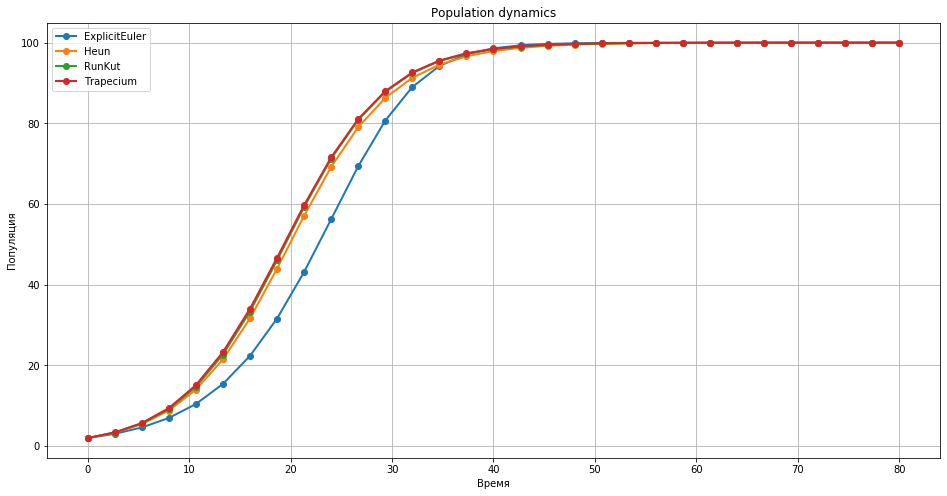

In [20]:
plt.figure(figsize=(16,8))
plt.title('Population dynamics')

for method in methods:
    meth = method(right_side, u_0, N, t_start, t_end)
    meth.solve()
    plt.plot(meth.time_arr, meth.solution_arr, '-o', linewidth=2, label=meth.__class__.__name__)

plt.xlabel('Время')
plt.ylabel('Популяция')
plt.grid('off')
plt.legend()
plt.show()